In [11]:
import matplotlib.pyplot as plt
from PIL.GimpGradientFile import linear

from macrosim.SeriesAccessor import SeriesAccessor
from macrosim.GrowthPatternDetector import GrowthPatternDetector
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='fred_key'
)

start = dt.datetime.fromisoformat("2000-01-01")
end = dt.datetime.fromisoformat("2024-01-01")

df = fred.get_series(
    series_ids=['NETEXP', 'CIVPART', 'LES1252881600Q', 'SPPOPGROWUSA', 'CORESTICKM159SFRBATL', 'GDPC1'],
    date_range=(start, end), reindex_freq='QS', series_alias=['NETEXP', 'CIVPART', 'RWAGE', 'POPGROWTH', 'CPI', 'RGDP'])

df = fred.fill(
    df,
    [*[None] * 3, 'ffill']
)
df

,NETEXP,CIVPART,RWAGE,POPGROWTH,CPI,RGDP
2000-01-01,-356.583,67.3,334.0,1.112769,2.335519,13878.147
2000-04-01,-362.501,67.3,334.0,1.112769,2.409239,14130.908
2000-07-01,-393.867,66.9,335.0,1.112769,2.712970,14145.312
2000-10-01,-411.343,66.8,334.0,1.112769,2.919941,14229.765
2001-01-01,-402.653,67.2,333.0,0.989741,2.878468,14183.120
...,...,...,...,...,...,...
2023-01-01,-813.648,62.4,364.0,0.491925,6.488339,22403.435
2023-04-01,-803.479,62.6,365.0,0.491925,6.267738,22539.418
2023-07-01,-781.091,62.6,366.0,0.491925,5.402919,22780.933
2023-10-01,-791.152,62.7,370.0,0.491925,4.882717,22960.600


C:\Users\Gong Jr\Documents\MacroSim\macrosim\GrowthPatternDetector.py:26: RuntimeWarning: invalid value encountered in scalar power
  return a * (t**c)


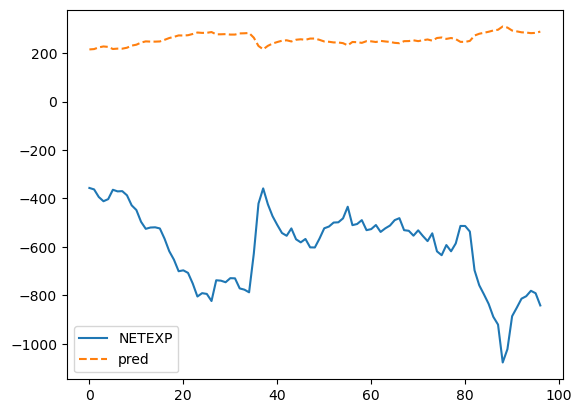

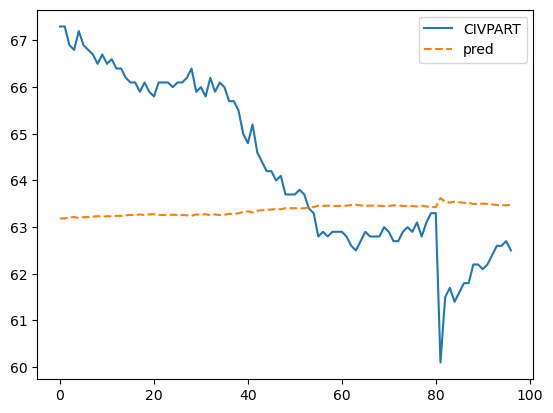

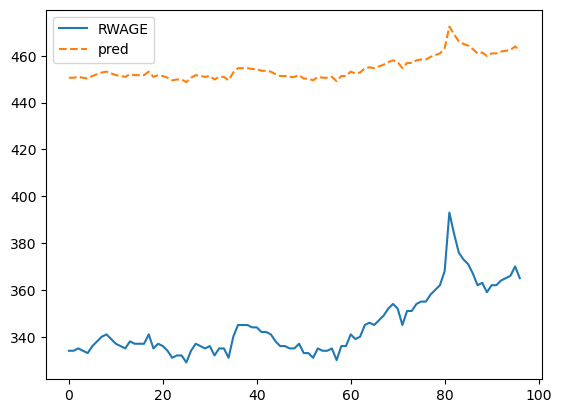

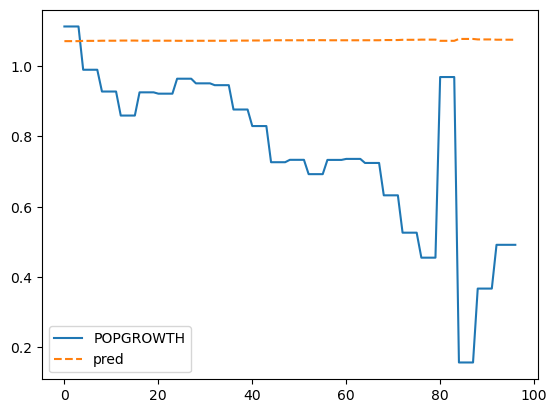

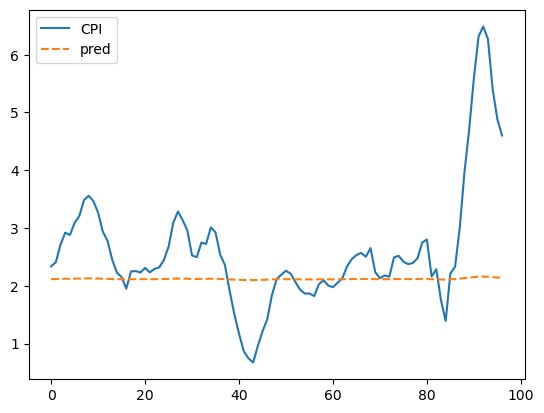

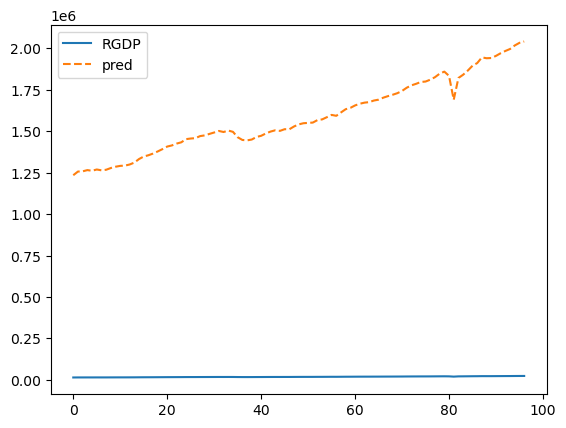

In [15]:
gpd = GrowthPatternDetector()
g = gpd.fit_pattern(df)
for col in df.columns:
    act = df[col].tolist()
    pred = [g[col][0](x) for x in act]

    plt.plot(act, label=col)
    plt.plot(pred, label="pred", linestyle='--')
    plt.legend()
    plt.show()


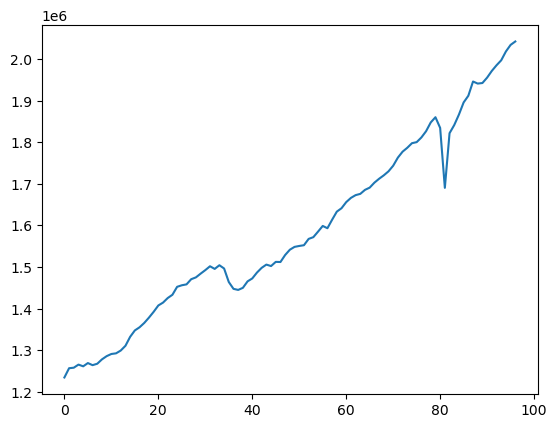

In [16]:
plt.plot([g['RGDP'][0](x) for x in df['RGDP'].values])

np.float64(214827.49466697848)